In [18]:
pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

# Baseline Scenario

In [2]:
import os

# Measure Package 0: Baseline
menu_mp = 0
input_mp = 'baseline'

# Get the current working directory of the project
project_root = os.path.abspath(os.getcwd())
print(f"Project root directory: {project_root}")

# Relative path to the file from the project root
relative_path = r"tare_baseline_cambium_v4.1.ipynb"

# Construct the absolute path to the file
file_path = os.path.join(project_root, relative_path)
print(f"File path: {file_path}")

# Run the notebook and import variables
if os.path.exists(relative_path):
    get_ipython().run_line_magic('run', f'-i "{relative_path}"')
    print("Baseline Scenario - Model Run Complete")
else:
    print(f"File not found: {relative_path}")

Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_baseline_cambium_v4.1.ipynb
Project root directory: c:\Users\14128\Research\cmu-tare-model
File path: c:\Users\14128\Research\cmu-tare-model\tare_model_functions_v4.1.ipynb
Loaded All TARE Model Functions
Result outputs will be exported here: c:\Users\14128\Research\cmu-tare-model\output_results

-------------------------------------------------------------------------------------------------------
Welcome to the Trade-off Analysis of residential Retrofits for energy Equity Tool (TARE Model)
Let's start by reading the data from the NREL EUSS Database.

Make sure that the zipped folders stay organized as they are once unzipped.
If changes are made to the file path, then the program will not run properly.
-------------------------------------------------------------------------------------------------------

----------------------------------------------------------------

## Dataframe for Electric Resistance Cooking (MP7)

In [3]:
print(f"""
-------------------------------------------------------------------------------------------------------
We assume the use of Electric Resistance (MP7) rather than Induction (MP8).
Electric Resistance is significantly cheaper and only slightly less efficient than Induction.
-------------------------------------------------------------------------------------------------------
""")

# Measure Package 7
menu_mp = 7
input_mp = 'upgrade07'

filename = "upgrade07_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp7 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp7['in.vacancy_status'] == 'Occupied'
df_euss_am_mp7 = df_euss_am_mp7.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp7['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp7 = df_euss_am_mp7.loc[house_type_filter]


-------------------------------------------------------------------------------------------------------
We assume the use of Electric Resistance (MP7) rather than Induction (MP8).
Electric Resistance is significantly cheaper and only slightly less efficient than Induction.
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade07_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade07_metadata_and_annual_results.csv




In [4]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp7['in.state'].eq(input_state)
    df_euss_am_mp7 = df_euss_am_mp7.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp7['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp7 = df_euss_am_mp7.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp7

You chose to filter for: PA
You chose to analyze all of state: PA


bldg_id  upgrade      weight  applicability  in.sqft  \
410846      119        7  242.131013           True   2152.0   
410847      122        7  242.131013           True   2176.0   
410848      150        7  242.131013          False   1690.0   
410849      153        7  242.131013           True   2176.0   
410850      162        7  242.131013           True   2663.0   
...         ...      ...         ...            ...      ...   
433889   549882        7  242.131013           True   1202.0   
433891   549915        7  242.131013          False   2176.0   
433892   549937        7  242.131013           True    885.0   
433893   549963        7  242.131013           True   1690.0   
433894   549989        7  242.131013           True   1220.0   

                                           in.ahs_region  \
410846  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410847  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410848                          Non-CBSA Middle Atlantic   
410849  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410850  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
...                                                  ...   
433889                          Non-CBSA Middle Atlantic   
433891                          Non-CBSA Middle Atlantic   
433892                          Non-CBSA Middle Atlantic   
433893                          Non-CBSA Middle Atlantic   
433894                          Non-CBSA Middle Atlantic   

       in.ashrae_iecc_climate_zone_2004  \
410846                               4A   
410847                               4A   
410848                               5A   
410849                               4A   
410850                               4A   
...                                 ...   
433889                               5A   
433891                               5A   
433892                               5A   
433893                               5A   
433894                               5A   

       in.ashrae_iecc_climate_zone_2004_2_a_split in.bathroom_spot_vent_hour  \
410846                                         4A                      Hour1   
410847                                         4A                     Hour18   
410848                                         5A                      Hour2   
410849                                         4A                      Hour6   
410850                                         4A                      Hour8   
...                                           ...                        ...   
433889                                         5A                      Hour5   
433891                                         5A                      Hour0   
433892                                         5A                     Hour20   
433893                                         5A                     Hour13   
433894                                         5A                     Hour22   

        in.bedrooms  ...  \
410846            4  ...   
410847            4  ...   
410848            4  ...   
410849            3  ...   
410850            5  ...   
...             ...  ...   
433889            2  ...   
433891            5  ...   
433892            4  ...   
433893            3  ...   
433894            3  ...   

       out.emissions_reduction.propane.lrmer_mid_case_15_2025_start.co2e_kg  \
410846                                           0.000000                     
410847                                           0.000000                     
410848                                           0.000000                     
410849                                           0.000000                     
410850                                           0.000000                     
...                                                   ...                     
433889                                           0.000000                     
433891                                           0.000000              

## Dataframe used for other end-uses (MP8)

In [5]:
# Measure Package 8
menu_mp = 8
input_mp = 'upgrade08'
scenario_name = 'Basic-BAU'
cost_scenario = 'BAU Costs'
grid_scenario = 'Current Electricity Grid'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")

filename = "upgrade08_metadata_and_annual_results.csv"
relative_path = os.path.join(r"euss_data\\resstock_amy2018_release_1.1\\state", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

# Fix DtypeWarning error in columns 'in.neighbors' and 'in.geometry_stories_low_rise'
columns_to_string = {11: str, 61: str, 121: str, 103: str, 128: str, 129: str}
df_euss_am_mp8 = pd.read_csv(file_path, dtype=columns_to_string)
occupancy_filter = df_euss_am_mp8['in.vacancy_status'] == 'Occupied'
df_euss_am_mp8 = df_euss_am_mp8.loc[occupancy_filter]

# Filter for single family home building type
house_type_list = ['Single-Family Attached', 'Single-Family Detached']
house_type_filter = df_euss_am_mp8['in.geometry_building_type_recs'].isin(house_type_list)
df_euss_am_mp8 = df_euss_am_mp8.loc[house_type_filter]
# df_euss_am_mp8


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic-BAU:
Basic Retrofit: Measure Package 8
BAU Costs
Current Electricity Grid
-------------------------------------------------------------------------------------------------------

Retrieved data for filename: upgrade08_metadata_and_annual_results.csv
Located at filepath: c:\Users\14128\Research\cmu-tare-model\euss_data\\resstock_amy2018_release_1.1\\state\upgrade08_metadata_and_annual_results.csv




In [6]:
# National Level 
if menu_state == 'N':
    print("You chose to analyze all of the United States.")
    input_state = 'National'

# Filter down to state or city
else:
    print(f"You chose to filter for: {input_state}")
    state_filter = df_euss_am_mp8['in.state'].eq(input_state)
    df_euss_am_mp8 = df_euss_am_mp8.loc[state_filter]

    # Filter for the entire selected state
    if menu_city == 'N':
        print(f"You chose to analyze all of state: {input_state}")
        
    # Filter to a city within the selected state
    else:
        print(f"You chose to filter for: {input_state}, {input_cityFilter}")
        city_filter = df_euss_am_mp8['in.city'].eq(f"{input_state}, {input_cityFilter}")
        df_euss_am_mp8 = df_euss_am_mp8.loc[city_filter]

# Display the filtered dataframe
df_euss_am_mp8

You chose to filter for: PA
You chose to analyze all of state: PA


bldg_id  upgrade      weight  applicability  in.sqft  \
410846      119        8  242.131013           True   2152.0   
410847      122        8  242.131013           True   2176.0   
410848      150        8  242.131013           True   1690.0   
410849      153        8  242.131013           True   2176.0   
410850      162        8  242.131013           True   2663.0   
...         ...      ...         ...            ...      ...   
433889   549882        8  242.131013           True   1202.0   
433891   549915        8  242.131013           True   2176.0   
433892   549937        8  242.131013           True    885.0   
433893   549963        8  242.131013           True   1690.0   
433894   549989        8  242.131013           True   1220.0   

                                           in.ahs_region  \
410846  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410847  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410848                          Non-CBSA Middle Atlantic   
410849  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
410850  CBSA Philadelphia-Camden-Wilmington, PA-NJ-DE-MD   
...                                                  ...   
433889                          Non-CBSA Middle Atlantic   
433891                          Non-CBSA Middle Atlantic   
433892                          Non-CBSA Middle Atlantic   
433893                          Non-CBSA Middle Atlantic   
433894                          Non-CBSA Middle Atlantic   

       in.ashrae_iecc_climate_zone_2004  \
410846                               4A   
410847                               4A   
410848                               5A   
410849                               4A   
410850                               4A   
...                                 ...   
433889                               5A   
433891                               5A   
433892                               5A   
433893                               5A   
433894                               5A   

       in.ashrae_iecc_climate_zone_2004_2_a_split in.bathroom_spot_vent_hour  \
410846                                         4A                      Hour1   
410847                                         4A                     Hour18   
410848                                         5A                      Hour2   
410849                                         4A                      Hour6   
410850                                         4A                      Hour8   
...                                           ...                        ...   
433889                                         5A                      Hour5   
433891                                         5A                      Hour0   
433892                                         5A                     Hour20   
433893                                         5A                     Hour13   
433894                                         5A                     Hour22   

        in.bedrooms  ...  \
410846            4  ...   
410847            4  ...   
410848            4  ...   
410849            3  ...   
410850            5  ...   
...             ...  ...   
433889            2  ...   
433891            5  ...   
433892            4  ...   
433893            3  ...   
433894            3  ...   

       out.emissions_reduction.all_fuels.lrmer_95_decarb_by_2035_15_2025_start.co2e_kg  \
410846                                        5063.088752                                
410847                                       12066.712342                                
410848                                        3103.153770                                
410849                                       12691.688692                                
410850                                       14912.014271                                
...                                                   ...                                
433889                                        5882.269769                

# Project Future Energy Consumption

In [7]:
print("""
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
""")

# df_enduse_compare(df_mp, category, df_baseline):
df_euss_am_mp8_home = df_enduse_compare(df_mp = df_euss_am_mp8,
                                        input_mp=input_mp,
                                        menu_mp=menu_mp,
                                        df_baseline = df_euss_am_baseline_home
                                        )
df_euss_am_mp8_home


-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP) Consumption: WHOLE-HOME
-------------------------------------------------------------------------------------------------------



bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  ...  \
0                       122    PA    Not in a census Place  G4200450  ...   
1                       122    PA  In another census Place  G4200450  ...   
2                       122    PA  In another census Place  G4201190  ...   
3                       122    PA    Not in a census Place  G4200450  ...   
4                       119    PA    Not in a census Place  G4200270  ...   
...                     ...   ...                      ...       ...  ...   
11604                   122    PA    Not in a census Place  G4200910  ...   
11605                   122    PA                Lancaster  G4200710  ...   
11606                   115    PA  In another census Place  G4200050  ...   
11607                   115    PA  In another census Place  G4201290  ...   
11608                   122    PA    Not in a census Place  G4201110  ...   

      size_water_heater_gal       upgrade_water_heater_efficiency  \
0                      66.0  Electric Heat Pump, 66 gal, 3.35 UEF   
1                      66.0  Electric Heat Pump, 66 gal, 3.35 UEF   
2                      66.0  Electric Heat Pump, 66 gal, 3.35 UEF   
3                      80.0  Electric Heat Pump, 80 gal, 3.45 UEF   
4                      66.0  Electric Heat Pump, 66 gal, 3.35 UEF   
...                     ...                                   ...   
11604                  80.0  Electric Heat Pump, 80 gal, 3.45 UEF   
11605                  80.0  Electric Heat Pump, 80 gal, 3.45 UEF   
11606                  66.0  Electric Heat Pump, 66 gal, 3.35 UEF   
11607                  50.0  Electric Heat Pump, 50 gal, 3.45 UEF   
11608                  50.0  Electric Heat Pump, 50 gal, 3.45 UEF   

      clothes_dryer_in_unit  \
0           Gas, 100% Usage   
1      Electric, 100% Usage   
2       Electric, 80% Usage   
3       Electric, 80% Usage   
4      Electric, 100% Usage   
...                     ...   
11604       Gas, 100% Usage   
11605  Electric, 100% Usage   
11606       Gas, 120% Usage   
11607  Electric, 100% Usage   
11608  Electric, 100% Usage   

                                   upgrade_clothes_dryer  \
0      Electric, Premium, Heat Pump, Ventless, 100% U...   
1      Electric, Premium, Heat Pump, Ventless, 100% U...   
2      Electric, Premium, Heat Pump, Ventless, 80% Usage   
3      Electric, Premium, Heat Pump, Ventless, 80% Usage   
4      Electric, Premium, Heat Pump, Ventless, 100% U...   
...               

In [8]:
print("""
-------------------------------------------------------------------------------------------------------
PROJECT FUTURE ENERGY CONSUMPTION
-------------------------------------------------------------------------------------------------------
Creating dataframe to store annual energy consumption calculations ...
""")

df_mp8_scenario_consumption = df_euss_am_mp8_home.copy()

# Project Future Energy Consumption
df_mp8_scenario_consumption = project_future_consumption(df=df_mp8_scenario_consumption,
                                                         hdd_factor_lookup=hdd_factor_lookup,
                                                         menu_mp=menu_mp
                                                         )
df_mp8_scenario_consumption


-------------------------------------------------------------------------------------------------------
PROJECT FUTURE ENERGY CONSUMPTION
-------------------------------------------------------------------------------------------------------
Creating dataframe to store annual energy consumption calculations ...

Projecting Future Energy Consumption (Upgraded Equipment): heating
Projecting Future Energy Consumption (Upgraded Equipment): waterHeating
Projecting Future Energy Consumption (Upgraded Equipment): clothesDrying
Projecting Future Energy Consumption (Upgraded Equipment): cooking


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  ...  \
0                       122    PA    Not in a census Place  G4200450  ...   
1                       122    PA  In another census Place  G4200450  ...   
2                       122    PA  In another census Place  G4201190  ...   
3                       122    PA    Not in a census Place  G4200450  ...   
4                       119    PA    Not in a census Place  G4200270  ...   
...                     ...   ...                      ...       ...  ...   
11604                   122    PA    Not in a census Place  G4200910  ...   
11605                   122    PA                Lancaster  G4200710  ...   
11606                   115    PA  In another census Place  G4200050  ...   
11607                   115    PA  In another census Place  G4201290  ...   
11608                   122    PA    Not in a census Place  G4201110  ...   

      mp8_2034_cooking_consumption mp8_2034_cooking_reduction_consumption  \
0                           474.48                                 511.70   
1                           339.67                                   0.00   
2                           324.43                                   0.00   
3                           429.94                                   0.00   
4                           405.61                                   0.00   
...                            ...                                    ...   
11604                       405.61                                 435.80   
11605                       603.14                                   0.00   
11606                       644.76                                 696.63   
11607                       405.61                                   0.00   
11608                       405.61                                 435.80   

      mp8_2035_cooking_consumption  mp8_2035_cooking_reduction_consumption  \
0                           474.48                                  511.70   
1                           339.67                                    0.00   
2                           324.43                                    0.00   
3                           429.94                                    0.00   
4                           405.61                                    0.00   
...                            ...                                     ...   
11604                       405.61                                  435.80   
11605                       603

# Model Future Climate Damages and Annual Fuel Costs
## Scenarios: No IRA and IRA-Reference

In [9]:
print("""
Model Future Climate Damages and Annual Fuel Costs for Scenarios No IRA and IRA-Reference
""")

# Make copies from scenario consumption to keep df smaller
print("\n", "Creating dataframe to store marginal damages calculations ...")
df_mp8_scenario_damages = df_mp8_scenario_consumption.copy()

print("\n", "Creating dataframe to store annual fuel cost calculations ...")
df_mp8_scenario_fuelCosts = df_mp8_scenario_consumption.copy()


Model Future Climate Damages and Annual Fuel Costs for Scenarios No IRA and IRA-Reference


 Creating dataframe to store marginal damages calculations ...

 Creating dataframe to store annual fuel cost calculations ...


## Future Climate Damages: No IRA and IRA-Reference

In [10]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 

Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
Public Perspective: Monetized Marginal Damages from Emissions
------------------------------------------------------------------------------------------------------------------------------------------------
**Steps 1-4 were performed in the Baseline Scenario**
- Step 1: Calculate emissions factors for different fuel sources
- Step 2: Adjust Natural Gas & Electricity Emissions Factors for Natural Gas Leakage
- Step 3: Quantify monitized damages using EASIUR Marginal Social Cost Factors
- Step 4: Inflate Marginal Social Cost (Damage) Factors using BLS CPI for All Urban Consumers (CPI-U) 

Step 5: Calculate End-use specific marginal damages
------------------------------------------------------------------------------------------------------------------------------------------------



In [30]:
print("""  
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP8) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Marginal Damages for each end-use ...
-------------------------------------------------------------------------------------------------------
""")

# calculate_marginal_damages(df, menu_mp, policy_scenario)
print("\n", "Modeling Scenario: No Inflation Reduction Act")
df_mp8_scenario_damages = calculate_marginal_damages(df=df_mp8_scenario_damages, menu_mp=menu_mp, policy_scenario='No Inflation Reduction Act', df_summary=df_euss_am_mp8_home)


print("\n","Modeling Scenario: AEO2023 Reference Case")
df_mp8_scenario_damages = calculate_marginal_damages(df=df_mp8_scenario_damages, menu_mp=menu_mp, policy_scenario='AEO2023 Reference Case', df_summary=df_euss_am_mp8_home)

# # Display dataframe
df_mp8_scenario_damages

  
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP8) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Marginal Damages for each end-use ...
-------------------------------------------------------------------------------------------------------


 Modeling Scenario: No Inflation Reduction Act
Calculating marginal emissions and marginal damages for heating
Calculating marginal emissions and marginal damages for waterHeating
Calculating marginal emissions and marginal damages for clothesDrying
Calculating marginal emissions and marginal damages for cooking

 Modeling Scenario: AEO2023 Reference Case
Calculating marginal emissions and marginal damages for he

bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

In [16]:
print("""  
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP8) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Marginal Damages for each end-use ...
-------------------------------------------------------------------------------------------------------
""")

# calculate_marginal_damages(df, menu_mp, policy_scenario)
print("\n", "Modeling Scenario: No Inflation Reduction Act")
df_mp8_scenario_damages = calculate_marginal_damages(df=df_mp8_scenario_damages, menu_mp=menu_mp, policy_scenario='No Inflation Reduction Act', df_summary=df_euss_am_mp8_home)


print("\n","Modeling Scenario: AEO2023 Reference Case")
df_mp8_scenario_damages = calculate_marginal_damages(df=df_mp8_scenario_damages, menu_mp=menu_mp, policy_scenario='AEO2023 Reference Case', df_summary=df_euss_am_mp8_home)

# # Display dataframe
# df_mp8_scenario_damages

  
-------------------------------------------------------------------------------------------------------
Post-Retrofit (MP8) Marginal Damages: WHOLE-HOME
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Marginal Damages for each end-use ...
-------------------------------------------------------------------------------------------------------


 Modeling Scenario: No Inflation Reduction Act
Calculating marginal emissions and marginal damages for heating
Calculating marginal emissions and marginal damages for waterHeating
Calculating marginal emissions and marginal damages for clothesDrying
Calculating marginal emissions and marginal damages for cooking

 Modeling Scenario: AEO2023 Reference Case
Calculating marginal emissions and marginal damages for he

## Future Annual Fuel Costs: No IRA and IRA-Reference

In [34]:
print("""  
-------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
-------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Annual Fuel Costs for each end-use ...
-------------------------------------------------------------------------------------------------------
""")

# calculate_annual_fuelCost(df, menu_mp, policy_scenario)
print("\n", "Modeling Scenario: No Inflation Reduction Act")
df_mp8_scenario_fuelCosts = calculate_annual_fuelCost(df=df_mp8_scenario_fuelCosts, menu_mp=menu_mp, policy_scenario='No Inflation Reduction Act', drop_fuel_cost_columns=False)

print("\n","Modeling Scenario: AEO2023 Reference Case")
df_mp8_scenario_fuelCosts = calculate_annual_fuelCost(df=df_mp8_scenario_fuelCosts, menu_mp=menu_mp, policy_scenario='AEO2023 Reference Case', drop_fuel_cost_columns=False)

# Display dataframe
df_mp8_scenario_fuelCosts

  
-------------------------------------------------------------------------------------------------------
Private Perspective: Annual Energy Costs
-------------------------------------------------------------------------------------------------------
- Step 1: Obtain Level Energy Fuel Cost Data from the EIA
- Step 2: Calculate Annual Operating (Fuel) Costs
-------------------------------------------------------------------------------------------------------
Scenario: No Inflation Reduction Act and AEO2023 Reference Case
-------------------------------------------------------------------------------------------------------
Calculating Annual Fuel Costs for each end-use ...
-------------------------------------------------------------------------------------------------------


 Modeling Scenario: No Inflation Reduction Act
Calculating POST-RETROFIT (MP8) fuel costs from 2024 to 2039 for heating
Calculating POST-RETROFIT (MP8) fuel costs from 2024 to 2036 for waterHeating
Calculating P

bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

# Calculate Capital Costs and Rebate Amounts

## Calculate Capital Costs (Applicable to All Scenarios)

In [35]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP10))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------
""")


------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS
------------------------------------------------------------------------------------------------------------------------------------------------
- Step 1: Calculate annual operating (fuel) costs
- Step 2: Calculate equipment capital costs (For space heating, include ductwork and weatherization (MP9 and MP10))
- Step 3: Calculate replacement cost (replacing existing piece of eqipment with similar technology)
- Step 4: Calculate net equipment capital costs
- Step 5: Calculate private NPV
------------------------------------------------------------------------------------------------------------------------------------------------



In [36]:
# Collect Capital Cost Data for different End-uses
filename = "tare_retrofit_costs_cpi.xlsx"
relative_path = os.path.join(r"retrofit_costs", filename)
file_path = os.path.join(project_root, relative_path)

print(f"Retrieved data for filename: {filename}")
print(f"Located at filepath: {file_path}")
print("\n")

df_heating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='heating_costs')
df_waterHeating_retrofit_costs = pd.read_excel(io=file_path, sheet_name='waterHeating_costs')
df_clothesDrying_retrofit_costs = pd.read_excel(io=file_path, sheet_name='clothesDrying_costs')
df_cooking_retrofit_costs = pd.read_excel(io=file_path, sheet_name='cooking_costs')
df_enclosure_retrofit_costs = pd.read_excel(io=file_path, sheet_name='enclosure_upgrade_costs')

Retrieved data for filename: tare_retrofit_costs_cpi.xlsx
Located at filepath: c:\Users\14128\Research\cmu-tare-model\retrofit_costs\tare_retrofit_costs_cpi.xlsx




In [37]:
# Assuming df_rsMeans_cityCostIndex is your DataFrame with average costs
# Accounts for the costs of materials, labor and equipment and compares it to a national average of 30 major U.S. cities
average_cost_map = df_rsMeans_cityCostIndex.set_index('City')['Average'].to_dict()
rsMeans_national_avg = round((3.00 * (cpi_ratio_2023_2019)), 2)

# Use CCI to adjust for cost differences when compared to the national average
# Call the function and map the values for CCI adjustment
df_euss_am_mp8_home['rsMeans_CCI_avg'] = df_euss_am_mp8_home['city'].apply(map_average_cost)
df_euss_am_mp8_home

bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

### Space Heating and No Enclosure Upgrade

#### Space Heating Capital Costs

In [38]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_kBtuh_progressive', 'cost_per_kBtuh_reference', 'cost_per_kBtuh_conservative',
    'otherCost_progressive', 'otherCost_reference', 'otherCost_conservative'
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_heating_retrofit_costs[column] = round((df_heating_retrofit_costs[column] * df_heating_retrofit_costs['cpi_ratio'] * df_heating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_heating_equipment_cost = df_heating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_heating_equipment_cost

# Call the function and obtain equipment specifications
# obtain_heating_system_specs(df)
print("Obtaining system specs ...")
df_euss_am_mp8_home = obtain_heating_system_specs(df_euss_am_mp8_home)

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Retrofit Upgrade: Heat Pump for Space Heating (No Enclosure Upgrade) ...")
df_euss_am_mp8_home = calculate_installation_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...")
df_euss_am_mp8_home = calculate_replacement_cost(df_euss_am_mp8_home, dict_heating_equipment_cost, rsMeans_national_avg, menu_mp, 'heating')

# Call the function and calculate installation premium based on existing housing characteristics
# calculate_heating_installation_premium(df, rsMeans_national_avg, cpi_ratio_2023_2013)
print("Calculating Space Heating Specific Premiums (Ex: Removing Hydronic Boiler) ...")
df_euss_am_mp8_home = calculate_heating_installation_premium(df_euss_am_mp8_home, rsMeans_national_avg, cpi_ratio_2023_2013)

# Display the df
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Space Heating
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...

Obtaining system specs ...
Calculating Cost of Retrofit Upgrade: Heat Pump for Space Heating (No Enclosure Upgrade) ...
Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...
Calculating Space Heating Specific Premiums (Ex: Removing Hydronic Boiler) ...


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

### Water Heating

In [39]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...
""")

cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
    'cost_per_gallon_progressive', 'cost_per_gallon_reference', 'cost_per_gallon_conservative',
]

# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_waterHeating_retrofit_costs[column] = round((df_waterHeating_retrofit_costs[column] * df_waterHeating_retrofit_costs['cpi_ratio'] * df_waterHeating_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_waterHeating_equipment_cost = df_waterHeating_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_waterHeating_equipment_cost

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Retrofit Upgrade: Electric Heat Pump Water Heater ...")
df_euss_am_mp8_home = calculate_installation_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...")
df_euss_am_mp8_home = calculate_replacement_cost(df_euss_am_mp8_home, dict_waterHeating_equipment_cost, rsMeans_national_avg, menu_mp, 'waterHeating')

# Display the df
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Water Heating
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...

Calculating Cost of Retrofit Upgrade: Electric Heat Pump Water Heater ...
Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

### Clothes Drying

In [40]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ... 
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_clothesDrying_retrofit_costs[column] = round((df_clothesDrying_retrofit_costs[column] * df_clothesDrying_retrofit_costs['cpi_ratio'] * df_clothesDrying_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_clothesDrying_equipment_cost = df_clothesDrying_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_clothesDrying_equipment_cost

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Retrofit Upgrade: Ventless Heat Pump Clothes Dryer ...")
df_euss_am_mp8_home = calculate_installation_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...")
df_euss_am_mp8_home = calculate_replacement_cost(df_euss_am_mp8_home, dict_clothesDrying_equipment_cost, rsMeans_national_avg, menu_mp, 'clothesDrying')

# Display the df
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Clothes Drying
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ... 

Calculating Cost of Retrofit Upgrade: Ventless Heat Pump Clothes Dryer ...
Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

### Cooking

In [41]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...      
""")

# Columns to update
cost_columns = [
    'unitCost_progressive', 'unitCost_reference', 'unitCost_conservative',
]
 
# Update each cost column by multiplying with cpi_ratio and cost_multiplier
for column in cost_columns:
    df_cooking_retrofit_costs[column] = round((df_cooking_retrofit_costs[column] * df_cooking_retrofit_costs['cpi_ratio'] * df_cooking_retrofit_costs['cost_multiplier']), 2)

# Creating a dictionary from the DataFrame
dict_cooking_equipment_cost = df_cooking_retrofit_costs.set_index(['technology', 'efficiency']).to_dict(orient='index')
# dict_cooking_equipment_cost

# calculate_installation_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Retrofit Upgrade: Electric Resistance Range ...")
df_euss_am_mp8_home = calculate_installation_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# calculate_replacement_cost(df, cost_dict, rsMeans_national_avg, menu_mp, end_use)
print("Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...")
df_euss_am_mp8_home = calculate_replacement_cost(df_euss_am_mp8_home, dict_cooking_equipment_cost, rsMeans_national_avg, menu_mp, 'cooking')

# Display the df
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
Capital Costs: Cooking
------------------------------------------------------------------------------------------------------------------------------------------------

Obtaining Capital Cost Data from Retrofit Cost Spreadsheet ...      

Calculating Cost of Retrofit Upgrade: Electric Resistance Range ...
Calculating Cost of Replacing Existing Equipment with Similar Model/Efficiency ...


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type         income federal_poverty_level  \
0         39.87  Single-Family Attached  100000-119999                 400%+   
1         39.87  Single-Family Detached    25000-29999              200-300%   
2         41.24  Single-Family Detached    50000-59999              300-400%   
3         39.87  Single-Family Detached        200000+                 400%+   
4         40.85  Single-Family Detached  100000-119999                 400%+   
...         ...                     ...            ...                   ...   
11604     40.20  Single-Family Detached  180000-199999                 400%+   
11605     40.12  Single-Family Detached    80000-99999              200-300%   
11606     40.78  Single-Family 

 ## Calculate Rebate Amounts (Applicable to IRA-Reference)

In [42]:
# Determine Percent AMI and Rebate Amounts
# This needs to be done before running the calculate_percent_AMI function
df_euss_am_mp8_home = df_euss_am_mp8_home.copy()

# calculate_percent_AMI(df_results_IRA, df_county_medianIncome):
df_euss_am_mp8_home = calculate_percent_AMI(df_euss_am_mp8_home)

print("Calculating rebate amounts for Space Heating ...")
df_euss_am_mp8_home = calculate_rebateIRA(df_euss_am_mp8_home, "heating", menu_mp)

print("Calculating rebate amounts for Water Heating ...")
df_euss_am_mp8_home = calculate_rebateIRA(df_euss_am_mp8_home, "waterHeating", menu_mp)

print("Calculating rebate amounts for Clothes Drying ...")
df_euss_am_mp8_home = calculate_rebateIRA(df_euss_am_mp8_home, "clothesDrying", menu_mp)

print("Calculating rebate amounts for Cooking ...")
df_euss_am_mp8_home = calculate_rebateIRA(df_euss_am_mp8_home, "cooking", menu_mp)

Calculating rebate amounts for Space Heating ...
Calculating rebate amounts for Water Heating ...
Calculating rebate amounts for Clothes Drying ...
Calculating rebate amounts for Cooking ...


# SCENARIO ANALYSIS: Basic Pre-IRA Scenario
## - NREL End-Use Savings Shapes Database: Measure Package 8
## - AEO2023 No Inflation Reduction Act
## - Cambium 2021 MidCase Scenario

In [43]:
# Measure Package 8
scenario_name = 'No Inflation Reduction Act'
cost_scenario = 'Fuel Costs: AEO2023 No Inflation Reduction Act'
grid_scenario = 'Electricity Grid: Cambium 2021 MidCase Scenario'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario No Inflation Reduction Act:
Basic Retrofit: Measure Package 8
Fuel Costs: AEO2023 No Inflation Reduction Act
Electricity Grid: Cambium 2021 MidCase Scenario
-------------------------------------------------------------------------------------------------------



In [44]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
PUBLIC PERSPECTIVE COSTS AND BENEFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------
""")
# calculate_public_npv(df, df_damages menu_mp, policy_scenario, equipment_specs, interest_rate=0.02)
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           df_damages=df_mp8_scenario_damages,
                                           menu_mp=menu_mp,
                                           policy_scenario='No Inflation Reduction Act',
                                           interest_rate=0.02,
                                           )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
PUBLIC PERSPECTIVE COSTS AND BENEFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------


Calculating Public NPV for heating...
              lifetime: 15, interest_rate: 0.02, policy_scenario: No Inflation Reduction Act

Calculating Public NPV for waterHeating...
              lifetime: 12, interest_rate: 0.02, policy_scenario: No Inflation Reduction Act

Calculating Public NPV for clothesDrying...
              lifetime: 13, interest_rate: 0.02, policy_scenario: No Inflation Reduction Act

Calculating Public NPV for cooking...
              lifetime: 15, interest_rate: 0.02, policy_scenario: No Inflation Reduction Act


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

In [45]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------
""")
# calculate_private_npv(df, df_fuelCosts, menu_mp, policy_scenario, equipment_specs, interest_rate=0.07)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            df_fuelCosts=df_mp8_scenario_fuelCosts,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            policy_scenario='No Inflation Reduction Act',
                                            interest_rate=0.07,
                                            )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------


Calculating costs for heating...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: No Inflation Reduction Act

Calculating Private NPV for heating...
          lifetime: 15, interest_rate: 0.07, policy_scenario: No Inflation Reduction Act
          

Calculating costs for waterHeating...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: No Inflation Reduction Act

Calculating Private NPV for waterHeating...
          lifetime: 12, interest_rate: 0.07, policy_scenario: No Inflation Reduction Act
          

Calculating costs for clothesDrying...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: No Inflat

bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

In [46]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
ADOPTION FEASIBILITY OF VARIOUS RETROFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------
Determining Adoption Decision for each end-use ...
""")
# adoption_decision(df, policy_scenario)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        policy_scenario='No Inflation Reduction Act'
                                        )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
ADOPTION FEASIBILITY OF VARIOUS RETROFITS: NO INFLATION REDUCTION ACT
------------------------------------------------------------------------------------------------------------------------------------------------
Determining Adoption Decision for each end-use ...



bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

# Basic IRA-Reference Scenario:
## - NREL End-Use Savings Shapes Database: Measure Package 8
## - AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
## - Cambium 2023 MidCase Scenario

In [47]:
# Measure Package 8
scenario_name = 'Basic IRA-Reference'
cost_scenario = 'Fuel Costs: AEO2023 Reference Case'
grid_scenario = 'Electricity Grid: Cambium 2023 MidCase Scenario'

print(f"""
-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario {scenario_name}:
Basic Retrofit: Measure Package {menu_mp}
{cost_scenario}
{grid_scenario}
-------------------------------------------------------------------------------------------------------
""")


-------------------------------------------------------------------------------------------------------
MODEL SCENARIO
-------------------------------------------------------------------------------------------------------
Scenario Basic IRA-Reference:
Basic Retrofit: Measure Package 8
Fuel Costs: AEO2023 Reference Case
Electricity Grid: Cambium 2023 MidCase Scenario
-------------------------------------------------------------------------------------------------------



In [48]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
PUBLIC PERSPECTIVE COSTS AND BENEFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------
""")
# calculate_public_npv(df, df_damages menu_mp, policy_scenario, equipment_specs, interest_rate=0.02)
df_euss_am_mp8_home = calculate_public_npv(df=df_euss_am_mp8_home,
                                           df_damages=df_mp8_scenario_damages,
                                           menu_mp=menu_mp,
                                           policy_scenario='AEO2023 Reference Case',
                                           interest_rate=0.02,
                                           )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
PUBLIC PERSPECTIVE COSTS AND BENEFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------


Calculating Public NPV for heating...
              lifetime: 15, interest_rate: 0.02, policy_scenario: AEO2023 Reference Case

Calculating Public NPV for waterHeating...
              lifetime: 12, interest_rate: 0.02, policy_scenario: AEO2023 Reference Case

Calculating Public NPV for clothesDrying...
              lifetime: 13, interest_rate: 0.02, policy_scenario: AEO2023 Reference Case

Calculating Public NPV for cooking...
              lifetime: 15, interest_rate: 0.02, policy_scenario: AEO2023 Reference Case


bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

In [49]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------
""")
# calculate_private_npv(df, df_fuelCosts, menu_mp, policy_scenario, equipment_specs, interest_rate=0.07)
df_euss_am_mp8_home = calculate_private_NPV(df=df_euss_am_mp8_home,
                                            df_fuelCosts=df_mp8_scenario_fuelCosts,
                                            menu_mp=menu_mp,
                                            input_mp=input_mp,
                                            policy_scenario='AEO2023 Reference Case',
                                            interest_rate=0.07,
                                            )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
PRIVATE PERSPECTIVE COSTS AND BENEFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------


Calculating costs for heating...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: AEO2023 Reference Case

Calculating Private NPV for heating...
          lifetime: 15, interest_rate: 0.07, policy_scenario: AEO2023 Reference Case
          

Calculating costs for waterHeating...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: AEO2023 Reference Case

Calculating Private NPV for waterHeating...
          lifetime: 12, interest_rate: 0.07, policy_scenario: AEO2023 Reference Case
          

Calculating costs for clothesDrying...
          input_mp: upgrade08, menu_mp: 8, policy_scenario: AEO2023 Reference Case

Calcu

bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

In [50]:
print("""
------------------------------------------------------------------------------------------------------------------------------------------------
ADOPTION FEASIBILITY OF VARIOUS RETROFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------
Determining Adoption Decision for each end-use ...
""")
# adoption_decision(df, policy_scenario)
df_euss_am_mp8_home = adoption_decision(df=df_euss_am_mp8_home,
                                        policy_scenario='AEO2023 Reference Case'
                                        )
df_euss_am_mp8_home


------------------------------------------------------------------------------------------------------------------------------------------------
ADOPTION FEASIBILITY OF VARIOUS RETROFITS: AEO2023 REFERENCE CASE
------------------------------------------------------------------------------------------------------------------------------------------------
Determining Adoption Decision for each end-use ...



bldg_id  square_footage census_region  census_division  \
0          119          2152.0     Northeast  Middle Atlantic   
1          122          2176.0     Northeast  Middle Atlantic   
2          150          1690.0     Northeast  Middle Atlantic   
3          162          2663.0     Northeast  Middle Atlantic   
4          181           885.0     Northeast  Middle Atlantic   
...        ...             ...           ...              ...   
11604   549748          3301.0     Northeast  Middle Atlantic   
11605   549915          2176.0     Northeast  Middle Atlantic   
11606   549937           885.0     Northeast  Middle Atlantic   
11607   549963          1690.0     Northeast  Middle Atlantic   
11608   549989          1220.0     Northeast  Middle Atlantic   

      census_division_recs building_america_climate_zone  \
0          Middle Atlantic                   Mixed-Humid   
1          Middle Atlantic                   Mixed-Humid   
2          Middle Atlantic                          Cold   
3          Middle Atlantic                   Mixed-Humid   
4          Middle Atlantic                          Cold   
...                    ...                           ...   
11604      Middle Atlantic                   Mixed-Humid   
11605      Middle Atlantic                          Cold   
11606      Middle Atlantic                          Cold   
11607      Middle Atlantic                          Cold   
11608      Middle Atlantic                          Cold   

       reeds_balancing_area state                     city    county  \
0                       122    PA    Not in a census Place  G4200450   
1                       122    PA  In another census Place  G4200450   
2                       122    PA  In another census Place  G4201190   
3                       122    PA    Not in a census Place  G4200450   
4                       119    PA    Not in a census Place  G4200270   
...                     ...   ...                      ...       ...   
11604                   122    PA    Not in a census Place  G4200910   
11605                   122    PA                Lancaster  G4200710   
11606                   115    PA  In another census Place  G4200050   
11607                   115    PA  In another census Place  G4201290   
11608                   122    PA    Not in a census Place  G4201110   

            puma      county_and_puma     weather_file_city  Longitude  \
0      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
1      G42003303  G4200450, G42003303     Philadelphia Intl     -75.23   
2      G42001100  G4201190, G42001100   Williamsport Lycomi     -76.92   
3      G42003301  G4200450, G42003301     Philadelphia Intl     -75.23   
4      G42001200  G4200270, G42001200       University Park     -77.84   
...          ...                  ...                   ...        ...   
11604  G42003103  G4200910, G42003103   Willow Grove Nas Jr     -75.15   
11605  G42003501  G4200710, G42003501             Lancaster     -76.29   
11606  G42001900  G4200050, G42001900  Butler Co Scholter F     -79.94   
11607  G42002003  G4201290, G42002003          Allegheny Co     -79.92   
11608  G42003800  G4201110, G42003800   John Murtha Johnsto     -78.83   

       Latitude           building_type    income federal_poverty_level  \
0         39.87  Single-Family Attached  109999.5                 400%+   
1         39.87  Single-Family Detached   27499.5              200-300%   
2         41.24  Single-Family Detached   54999.5              300-400%   
3         39.87  Single-Family Detached  200000.0                 400%+   
4         40.85  Single-Family Detached  109999.5                 400%+   
...         ...                     ...       ...                   ...   
11604     40.20  Single-Family Detached  189999.5                 400%+   
11605     40.12  Single-Family Detached   89999.5              200-300%   
11606     40.78  Single-Family Detached   89999.5              300-400%   
1

# Cost-Effectiveness and Retrofit Priorities

In [74]:
# import pandas as pd

# def create_df_adoption(df, menu_mp):
#     """
#     Generates a new DataFrame with specific adoption columns based on provided parameters.
    
#     Args:
#     df (pd.DataFrame): Original DataFrame.
#     menu_mp (int): Measure package identifier.

#     Returns:
#     pd.DataFrame: A DataFrame with the selected columns.
#     """    
#     # Create a copy of the dataframe
#     df_copy = df.copy()

#     # Begin df with these cols
#     df_copy['scc_usd2023_per_ton'] = np.round(epa_scc_usd2023_per_ton, 2)

#     summary_cols = ['bldg_id', 'state', 'city', 'county', 'puma', 'percent_AMI', 'lowModerateIncome_designation', 'scc_usd2023_per_ton']

#     # for category in ['heating', 'waterHeating', 'clothesDrying', 'cooking']:
#     for category in ['heating', 'waterHeating']:
#         df_copy[f'iraRef_{category}_usd2023_per_mtCO2e'] = round((df_copy[f'mp{menu_mp}_{category}_rebate_amount'] / df_copy[f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e']), 2)
        
#         cols_to_add = [
#             f'base_{category}_fuel',
#             f'mp{menu_mp}_{category}_rebate_amount', 
#             f'iraRef_mp{menu_mp}_{category}_avoided_tons_co2e', 
#             f'iraRef_{category}_usd2023_per_mtCO2e',
#             f'iraRef_mp{menu_mp}_{category}_public_npv',
#             f'iraRef_mp{menu_mp}_{category}_private_npv_lessWTP', 
#             f'iraRef_mp{menu_mp}_{category}_total_capitalCost', 
#             f'iraRef_mp{menu_mp}_{category}_private_npv_moreWTP', 
#             f'iraRef_mp{menu_mp}_{category}_net_capitalCost',
#             f'iraRef_mp{menu_mp}_{category}_adoption'
#         ]
        
#         # Use extend instead of append to add each element of cols_to_add to summary_cols
#         summary_cols.extend(cols_to_add)
        
#     # Select the relevant columns
#     df_copy = df_copy[summary_cols]

#     return df_copy

In [116]:
# df_mp8_summary = create_df_adoption(df=df_euss_am_mp8_home, menu_mp=8)
# df_mp8_summary

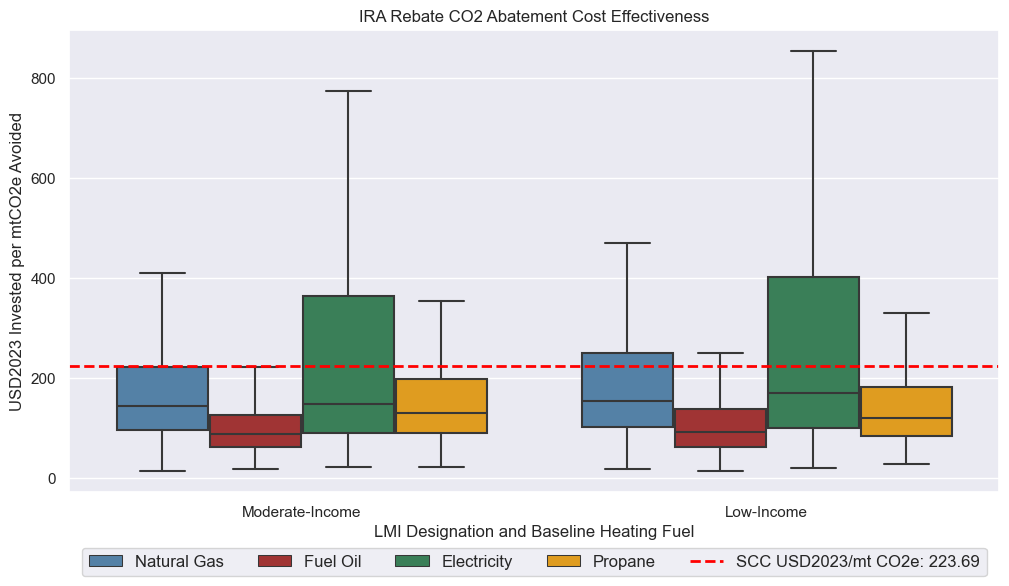

In [115]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df_mp8_summary is your DataFrame
# # Filter out the 'Middle-to-Upper-Income' rows
# df_filtered = df_mp8_summary[df_mp8_summary['lowModerateIncome_designation'] != 'Middle-to-Upper-Income']

# # Color map for fuel types
# color_map_fuel = {
#     'Electricity': 'seagreen',
#     'Natural Gas': 'steelblue',
#     'Propane': 'orange',
#     'Fuel Oil': 'firebrick',
# }

# plt.figure(figsize=(12, 6))

# # Create the boxplot
# sns.boxplot(
#     data=df_filtered,
#     x='lowModerateIncome_designation', 
#     y='iraRef_heating_usd2023_per_mtCO2e', 
#     hue='base_heating_fuel', 
#     palette=color_map_fuel, 
#     showfliers=False,
#     # gap=0.1,
# )

# # Add a red dashed line at the value of scc_usd2023_per_ton
# plt.axhline(y=epa_scc_usd2023_per_ton, color='red', linestyle='--', linewidth=2, label=f'SCC USD2023/mt CO2e: {round((epa_scc_usd2023_per_ton), 2)}')

# # Add title, labels, and legend
# plt.title('IRA Rebate CO2 Abatement Cost Effectiveness')
# plt.xlabel('LMI Designation and Baseline Heating Fuel')
# plt.ylabel('USD2023 Invested per mtCO2e Avoided')

# # Move legend to the bottom of the figure
# plt.legend(loc='lower center', prop={'size': 12}, bbox_to_anchor=(0.5, -0.2), ncol=5)
# plt.show()


# Model Runtime

In [54]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 314 minutes and 3 seconds to execute.
